In [1]:
import pandas as pd
df_FIBA = pd.read_csv("FIBA_Play_Counts.csv", encoding='latin-1')
df_FIBA.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_FIBA['Source'] = 'FIBA'
df_FIBA.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Ricky Rubio,284,121,64,20,0,0,9,25,7,16,546,FIBA
1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
3,Juancho Hernangomez,2,53,25,5,5,8,26,35,13,1,173,FIBA
4,Pierre Oriola,0,21,10,0,3,8,18,38,1,1,100,FIBA


In [2]:
df_INTL = pd.read_csv("INTL_Play_Counts.csv", encoding='latin-1')
df_INTL.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_INTL['Source'] = 'INTL'
df_INTL.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Jerome Randle,2780,417,638,633,0,1,67,99,107,173,4915,INTL
1,Elmedin Kikanovic,9,277,173,29,986,761,519,424,21,5,3204,INTL
2,Rickey Paulding,848,925,382,353,282,12,231,265,378,62,3738,INTL
3,Casper Ware,2059,471,430,637,4,1,48,76,166,185,4077,INTL
4,Daniel Johnson,32,474,373,84,853,348,331,399,43,25,2962,INTL


In [3]:
df = pd.concat([df_FIBA, df_INTL]).reset_index()
s = df['Player'].value_counts()
df[df['Player'].isin(s[s>=2].index)]

,index,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
1,1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
3,3,Juancho Hernangomez,2,53,25,5,5,8,26,35,13,1,173,FIBA
4,4,Pierre Oriola,0,21,10,0,3,8,18,38,1,1,100,FIBA
5,5,Facundo Campazzo,595,74,140,70,0,2,9,24,16,29,959,FIBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,3993,Denis Lukashov,17,11,3,8,0,0,2,2,3,1,47,INTL
6888,4015,Robert Rothbart,0,6,1,1,13,8,5,8,0,0,42,INTL
6968,4095,Gary Forbes,2,9,5,4,5,0,0,3,3,0,31,INTL
6975,4102,Vitaliy Lapchenko,0,10,2,0,0,6,4,8,0,0,30,INTL


In [4]:
play_types = ['P&R Ball Handler', 'Spot-Up', 'Transition', 'ISO', 'Post-Up', 'P&R Roll Man', 'Cut', 'Offensive Rebound', 'Off Screen', 'Hand Off']
for p in play_types:
    df['% ' + p] = df[p] / df['Total']

In [5]:
df = df[df['Total'] >= 50].sort_values('Total', ascending=False)
filt_df = df[['% ' + p for p in play_types]].copy()
filt_df

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
2873,0.565615,0.084842,0.129807,0.128789,0.000000,0.000203,0.013632,0.020142,0.021770,0.035198
2905,0.648402,0.100457,0.082192,0.094929,0.000240,0.000000,0.007690,0.024994,0.024994,0.016102
2876,0.505028,0.115526,0.105470,0.156242,0.000981,0.000245,0.011773,0.018641,0.040716,0.045377
2922,0.694299,0.084142,0.085636,0.071695,0.000996,0.000249,0.003485,0.029873,0.006472,0.023152
2883,0.584665,0.116633,0.141858,0.059441,0.002997,0.000500,0.006494,0.011239,0.050200,0.025974
...,...,...,...,...,...,...,...,...,...,...
654,0.000000,0.000000,0.060000,0.020000,0.140000,0.240000,0.300000,0.240000,0.000000,0.000000
6720,0.160000,0.100000,0.100000,0.040000,0.140000,0.000000,0.040000,0.240000,0.120000,0.060000
6785,0.280000,0.400000,0.060000,0.060000,0.000000,0.000000,0.000000,0.120000,0.080000,0.000000
908,0.480000,0.120000,0.200000,0.080000,0.000000,0.000000,0.000000,0.020000,0.060000,0.040000


In [6]:
from sklearn.cluster import KMeans
inertias = []
for i in range(5, 15):
    test_model = KMeans(n_clusters=i)
    test_model.fit(filt_df)
    inertias.append(test_model.inertia_)
print(inertias)

[121.18750521084476, 108.88309660952619, 97.58951011053577, 92.52405911532605, 88.32133817356404, 85.02090496487621, 81.78549575826308, 78.84805426917903, 76.04523590455574, 73.62283606130384]


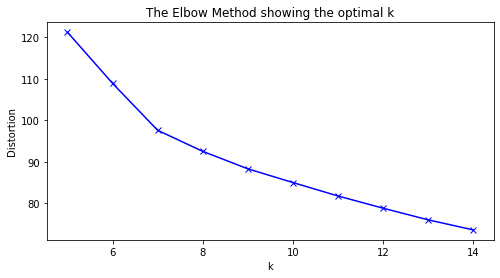

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
num_clusters = 7
test_model = KMeans(n_clusters=num_clusters)
test_model.fit(filt_df)
filt_df['Cluster'] = test_model.labels_
filt_df['Cluster'].value_counts()

3    977
0    852
1    850
5    744
6    681
4    621
2    452
Name: Cluster, dtype: int64

In [9]:
df['Cluster'] = test_model.labels_

In [10]:
for i in range(num_clusters):
    print("Cluster "+ str(i))
    print(list(df['Player'].loc[filt_df[filt_df['Cluster'] == i].head(15).index]))
    print()

Cluster 0
['Rickey Paulding', 'Brad Newley', 'Fernando San Emeterio', 'Thomas Abercrombie', 'Kyle Kuric', 'Javier Beiran', 'Jaycee Carroll', 'Rudy Fernandez', 'Jaka Blazic', 'Larry Gordon', 'Adam Hanga', 'Todd Blanchfield', 'Will Clyburn', 'Tony Crocker', 'Jeremy Chappell']

Cluster 1
['Jerome Randle', 'David Holston', 'Casper Ware', 'D.J. Cooper', 'Sergio Llull', 'Thomas Heurtel', 'Dru Joyce', 'Bobby Dixon', 'Justin Cobbs', 'Sergio Rodriguez', 'Joaquim Colom', 'Alexey Shved', 'Tomas Bellas', 'John Roberson', 'Jayson Granger']

Cluster 2
['Rasid Mahalbasic', 'Elmedin Kikanovic', 'John Bryant', 'Raymar Morgan', 'Ante Tomic', 'Bojan Dubljevic', 'Miro Bilan', 'Brian Conklin', 'Augustine Rubit', 'Vladimir Stimac', 'Tai Wesley', 'Vitalis Chikoko', 'Felipe Reyes', 'Giorgi Shermadini', 'Andreas Seiferth']

Cluster 3
['Chris Goulding', 'Reggie Redding', 'Quantez Robertson', 'Ryan Toolson', 'Nihad Djedovic', 'Dwight Hardy', 'Bryce Cotton', 'Petteri Koponen', 'Jason Cadee', 'D.J. Strawberry', 'J

In [11]:
filt_df.groupby('Cluster').mean()

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
Cluster,,,,,,,,,,
0,0.225608,0.274491,0.156600,0.070270,0.029438,0.003640,0.046544,0.070860,0.090172,0.032378
1,0.600630,0.128926,0.086795,0.086619,0.006155,0.000275,0.012781,0.029506,0.023444,0.024868
2,0.002367,0.070069,0.054326,0.021935,0.370358,0.148219,0.152059,0.173194,0.006240,0.001232
3,0.427403,0.187468,0.125096,0.091849,0.015570,0.000922,0.026374,0.045119,0.050721,0.029477
4,0.002148,0.074393,0.066149,0.015797,0.177011,0.218267,0.209670,0.230919,0.004098,0.001547
5,0.018749,0.259592,0.103564,0.051229,0.178455,0.104042,0.112638,0.136078,0.029674,0.005978
6,0.055532,0.413400,0.131551,0.037102,0.051224,0.039632,0.080199,0.118983,0.057364,0.015014


In [14]:
s = df['Player'].value_counts()
names_to_keep = s[s >= 2].index

filt_df = df[df['Player'].isin(names_to_keep)]

intl_df = filt_df[filt_df['Source'] == 'INTL'].sort_values('Player')
fiba_df = filt_df[filt_df['Source'] == 'FIBA'].sort_values('Player')
if False in intl_df['Player'].values == fiba_df['Player'].values:
    print("Some names do not match!")
else:
    print("All names match! Ready to create confusion matrix.")

All names match! Ready to create confusion matrix.


In [15]:
fiba_df.shape

(568, 25)

In [16]:
intl_df.shape

(568, 25)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(intl_df['Cluster'].values, fiba_df['Cluster'].values)
pd.DataFrame(cm)

,0,1,2,3,4,5,6
0,47,1,0,15,0,3,10
1,0,88,0,26,0,0,0
2,0,0,49,0,11,3,0
3,17,28,0,59,0,0,1
4,0,0,11,0,37,10,0
5,4,0,3,1,5,64,14
6,15,0,0,3,0,11,32


In [18]:
import numpy as np
sum(np.diag(cm))/sum(sum(cm))

0.6619718309859155

In [16]:
fiba_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.202813
% Spot-Up              0.166301
% Transition           0.119805
% ISO                  0.069373
% Post-Up              0.115954
% P&R Roll Man         0.067716
% Cut                  0.087666
% Offensive Rebound    0.106358
% Off Screen           0.043414
% Hand Off             0.020601
dtype: float64

In [17]:
nba_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.220353
% Spot-Up              0.178930
% Transition           0.110556
% ISO                  0.057706
% Post-Up              0.078116
% P&R Roll Man         0.083510
% Cut                  0.084898
% Offensive Rebound    0.109814
% Off Screen           0.043644
% Hand Off             0.032472
dtype: float64

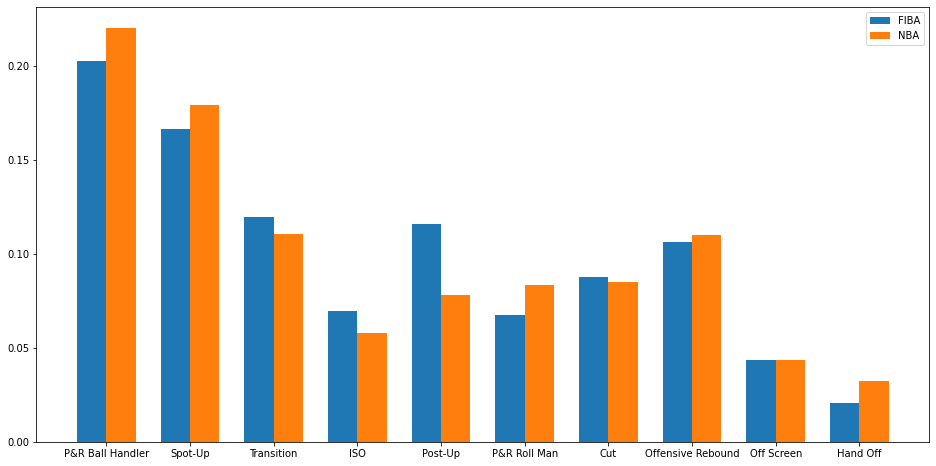

In [18]:
plt.figure(figsize = (16,8))
plt.bar([i for i in range(10)], fiba_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'FIBA')
plt.bar([i+0.35 for i in range(10)], nba_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'NBA')
plt.xticks([i+0.175 for i in range(10)], play_types)
plt.legend()
plt.show()

In [28]:
filt_df.groupby('Cluster')['Source'].value_counts()

Cluster  Source
0        NBA       22
         FIBA      11
1        FIBA      24
         NBA       22
2        FIBA      25
         NBA       11
3        NBA       29
         FIBA      23
4        NBA       31
         FIBA      22
5        FIBA      33
         NBA       27
6        FIBA      26
         NBA       22
Name: Source, dtype: int64